In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Aug 23 09:36:15 2024

@author: au605715
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Load the DataFrame
df_base = pd.read_csv(r'../results/processed_data/2_lmem_results/combined_results_base2.csv')
df_base.drop(columns=['StdErr', 'z', 'P'], axis=1, inplace=True)

# Load the DataFrame
df_tl = pd.read_csv(r'../results/processed_data/2_lmem_results/combined_results_tl3.csv')
df_tl.drop(columns=['StdErr', 'z', 'P'], axis=1, inplace=True)

# Load the DataFrame
df_single = pd.read_csv(r'../results/processed_data/2_lmem_results/combined_results_single2.csv')
df_single.drop(columns=['StdErr', 'z', 'P'], axis=1, inplace=True)

# Load the DataFrame
df_single3 = pd.read_csv(r'../results/processed_data/2_lmem_results/combined_results_single3.csv')
df_single3.drop(columns=['StdErr', 'z', 'P'], axis=1, inplace=True)


df_test = pd.read_csv(r'../results/processed_data/3_1_calculated_ressults/3_1_calculated_results_v6_race_lmem_v2.csv')

In [2]:
df_single3

,Contrast,Estimate,X2.5.,X97.5.
0,w_0,2.534888,2.413451,2.656326
1,w_10,2.536743,2.416896,2.656589
2,w_20,2.538597,2.420003,2.657192
3,w_30,2.540452,2.422760,2.658143
4,w_40,2.542306,2.425160,2.659453
5,w_50,2.544161,2.427196,2.661125
6,w_60,2.546015,2.428869,2.663162
7,w_70,2.547870,2.430178,2.665561
8,w_80,2.549724,2.431130,2.668318
9,w_90,2.551578,2.431732,2.671425


In [3]:
df_single

,Contrast,Estimate,X2.5.,X97.5.
0,w_0,2.534888,2.413451,2.656326
1,w_10,2.536743,2.416896,2.656589
2,w_20,2.538597,2.420003,2.657192
3,w_30,2.540452,2.422760,2.658143
4,w_40,2.542306,2.425160,2.659453
5,w_50,2.544161,2.427196,2.661125
6,w_60,2.546015,2.428869,2.663162
7,w_70,2.547870,2.430178,2.665561
8,w_80,2.549724,2.431130,2.668318
9,w_90,2.551578,2.431732,2.671425


In [4]:

# Split the 'Contrast' column into two separate columns


def extract_group(df, group):
    df[['Group', 'Ratio10']] = df['Contrast'].str.rsplit('_', n=1, expand=True)
    df_group = df[df['Group']== group]
    
    return df_group




#naive approach
y_value_gr1 = 2.445957494358572#  [1.90 - 2.32]
y_value_gr1_ci25  = 2.320706511978497
y_value_gr1_ci975 = 2.5712084767386467

y_value_gr2 = 2.40964479556775# [2.12 - 2.56]
y_value_gr2_ci25  = 2.284393813187675 
y_value_gr2_ci975 = 2.534895777947825 

y_value_single_gr1 = 2.536772767707459
y_value_single_gr1_ci25 = 2.3765404236675534
y_value_single_gr1_ci975 = 2.6970051117473646
y_value_single_gr2 = 2.6342507657246292 
y_value_single_gr2_ci25 = 2.4740184216847236
y_value_single_gr2_ci975 = 2.794483109764535



df_base_gr1 = extract_group(df_base, group="w")
df_base_gr2 = extract_group(df_base, group="b")
df_tl_gr1 = extract_group(df_tl, group="w")
df_tl_gr2 = extract_group(df_tl, group="b")

df_single_gr1 = extract_group(df_single, group="w")
df_single_gr2 = extract_group(df_single, group="b")
group1 = "White"
group2 = "Black"

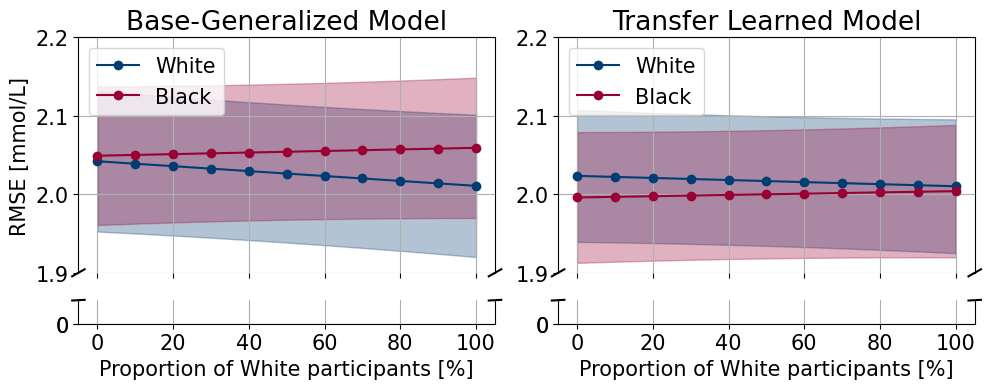

In [6]:
import matplotlib.pyplot as plt
import numpy as np
gr1_color = "#003d73"
gr2_color = "#990033"
marker1 = "o"
marker2 = "^"
marker3 = "x"

myFontsize = 15

x = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


# Create a figure with two columns of subplots, each with two stacked subplots for broken y-axis
fig, ((ax1_top, ax2_top), (ax1_bottom, ax2_bottom)) = plt.subplots(2, 2, 
                                                                   sharex='col', figsize=(10,4), 
                                                                   gridspec_kw={'height_ratios': [10, 1]})


# --- First plot (left) ---
# Top subplot for broken y-axis (higher range)
ax1_top.plot(x, df_base_gr1['Estimate'], marker=marker1, linestyle='-', color = gr1_color, label = 'White')
ax1_top.fill_between(x,df_base_gr1['X2.5.'],df_base_gr1['X97.5.'], color=gr1_color, alpha=0.3)
ax1_top.plot(x, df_base_gr2['Estimate'], marker=marker1, linestyle='-', color = gr2_color,label = 'Black' )
ax1_top.fill_between(x,df_base_gr2['X2.5.'],df_base_gr2['X97.5.'], color=gr2_color, alpha=0.3)

ax1_top.legend(loc='upper left', fontsize = myFontsize)

ax1_top.set_ylim(1.9, 2.2)  # Set higher y-limits
ax1_top.spines['bottom'].set_visible(False)
ax1_top.tick_params(labelbottom=False)  # Hide x-axis labels on the top subplot

# Bottom subplot for broken y-axis (lower range)
ax1_bottom.set_ylim(0, 0.5)  # Set lower y-limits
ax1_bottom.spines['top'].set_visible(False)

# --- Second plot (right) ---
# Top subplot for broken y-axis (higher range)
ax2_top.plot(x, df_tl_gr1['Estimate'], marker=marker1, linestyle='-', color = gr1_color, label = 'White')
ax2_top.fill_between(x, df_tl_gr1['X2.5.'], df_tl_gr1['X97.5.'], color=gr1_color, alpha=0.3)
ax2_top.plot(x, df_tl_gr2['Estimate'], marker=marker1, linestyle='-', color = gr2_color,label = 'Black' )
ax2_top.fill_between(x,df_tl_gr2['X2.5.'],df_tl_gr2['X97.5.'], color=gr2_color, alpha=0.3)

ax2_top.legend(loc='upper left', fontsize = myFontsize)

ax2_top.set_ylim(1.9, 2.2)  # Set higher y-limits for second plot
ax2_top.spines['bottom'].set_visible(False)
ax2_top.tick_params(labelbottom=False)

# Bottom subplot for broken y-axis (lower range)
ax2_bottom.set_ylim(0, 0.5)  # Set lower y-limits
ax2_bottom.spines['top'].set_visible(False)


# --- Adding break markers (diagonal lines) for both subplots ---
d = .015  # size of the diagonal break markers in axes coordinates

# Break markers for first subplot (left)
kwargs = dict(transform=ax1_top.transAxes, color='k', clip_on=False)
ax1_top.plot((-d, +d), (-d, +d), **kwargs)  # top-left diagonal
ax1_top.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
kwargs.update(transform=ax1_bottom.transAxes)
ax1_bottom.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax1_bottom.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# Break markers for second subplot (right)
kwargs = dict(transform=ax2_top.transAxes, color='k', clip_on=False)
ax2_top.plot((-d, +d), (-d, +d), **kwargs)  # top-left diagonal
ax2_top.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
kwargs.update(transform=ax2_bottom.transAxes)
ax2_bottom.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2_bottom.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

ax1_top.set_title("Base-Generalized Model", fontsize=myFontsize+4)
ax1_top.grid(True)
ax1_bottom.grid(True)

ax2_top.set_title("Transfer Learned Model", fontsize=myFontsize+4)
ax2_top.grid(True)
ax2_bottom.grid(True)

ax1_bottom.set_xlabel('Proportion of White participants [%]', fontsize=myFontsize)
ax1_top.set_ylabel('RMSE [mmol/L]', fontsize=myFontsize)
ax2_bottom.set_xlabel('Proportion of White participants [%]', fontsize=myFontsize)
# ax2_top.set_ylabel('RMSE [mmol/L]', fontsize=myFontsize)

ax1_bottom.set_yticks([0, 0])  # Remove the 0.5 tick
ax2_bottom.set_yticks([0, 0])  # Remove the 0.5 tick
ax1_top.tick_params(labelsize=myFontsize)  # Increase tick label size
ax2_top.tick_params(labelsize=myFontsize)  # Increase tick label size
ax1_bottom.tick_params(labelsize=myFontsize)  # Increase tick label size
ax2_bottom.tick_params(labelsize=myFontsize)  # Increase tick label size

plt.tight_layout()
plt.show()

# fig.set_size_inches(600/100, 800/100)  # Convert pixels to inches by dividing by dpi

# Save the figure with a lower dpi to reduce file size
# fig.savefig(f'../results/processed_data/2_lmem_results/2_lmem_plot_v5.png', dpi=100, format='png', bbox_inches='tight')